In [1]:
ID = "101615093" # your student id

# Assignment 3 - Quantifying Behavior of Groups - Part A

In this assignment, you will utilize the **ideas and techniques** from week 2 to conduct an in-depth activity analysis based on data collected from **a group of subjects**.

### Learning outcomes
Upon completing this assignment, you will be able to: 

1. Analyze behavioral data at the group level
2. Compare an individual's behavioral pattern against the aggregate pattern

### Table of Contents
* [Section 1: Introduction](#section_1)
* [Section 2: Preprocessing](#section_2)
    * [Section 2.1: Sleep records](#section_2_1)
    * [Section 2.2: Daily activity records](#section_2_2)
* [Section 3: Initial EDA](#section_3)
    * [Section 3.1: Active minutes distribution](#section_3_1)
    * [Section 3.2: Sum of active minutes per day](#section_3_2)
    * [Section 3.3: Individual activity](#section_3_3)
* [Section 4: Categorizing subjects](#section_4)
* [Section 5: Sleep analysis](#section_5)
    * [Section 5.1: Splitting records accroding to sleep conditions](#section_5_1)
    * [Section 5.2: Weekly sleep statistics](#section_5_2)

# 1. Introduction <a class="anchor" id="section_1"></a>

As introduced in last week's assignment, we can identify individual activity patterns and behavior from digital data. However, we continue to analyze those patterns at the individual level and generalize them to the population level. We can classify individuals into different groups based on specific traits, such as chronotypes, activeness, mobility preferences, etc.

An example of behavior stratification is the **chronotype**, the natural inclination to sleep or to be alert at a preferred time. There are three forms of chronotypes:
- *Night owl* (primarily active during the night)
- *Morning lark* (primarily active in the early morning)
- *Intermediate* (the most common type with no clear preference time for activeness)

Traditionally, an individual's chronotype can be inferred from a questionnaire such as the Munich Chronotype Questionnaire (MCTQ). With the ubiquity of personal devices nowadays, we can infer such traits from digital traces data, guaranteeing unbiased results and providing many interesting insights. For example, from call data analysis, it has been shown that morning larks typically maintain more extensive social networks than evening owls [1].

In this assignment, we will learn to classify people into groups based on activeness and sleep patterns. In addition, we will learn to predict people's chronotypes based on their interaction with personal devices.

## 2. Preprocessing <a class="anchor" id="section_2"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os

if 'AALTO_JUPYTERHUB' in os.environ:
    # using jupyter sharedata directory
    DATA = '/coursedata/pa3/'
else:
    DATA = './data/'

# params for plotting
plt.rcParams.update({'font.size':20})
sns.set(style="whitegrid", font_scale=1.5)


### 2.1. Sleep records <a class="anchor" id="section_2_1"></a>

The **sleep_df** contains **the subjects' sleep records**.

Columns:
- **Id**: Id of the subject.
- **Date**: Time when the record was generated.
- **TotalMinutesAsleep**: Sleep durations (in minutes).
- **TotalTimeInBed**: Time spent in bed (minutes).

In [2]:
# load sleep records
sleep_df = pd.read_csv(os.path.join(DATA, "sleep_activity.csv"))
# convert string to date object
sleep_df["Date"] = pd.to_datetime(sleep_df["Date"]).dt.date
# view
print(sleep_df.shape)
sleep_df.head()

(413, 4)


,Id,Date,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,327,346
1,1503960366,2016-04-13,384,407
2,1503960366,2016-04-15,412,442
3,1503960366,2016-04-16,340,367
4,1503960366,2016-04-17,700,712


### 2.2. Daily activity records <a class="anchor" id="section_2_2"></a>

The daily activity dataset comes from the same source as the dataset we used in the Week 2 assignment, except that this time, it contains data obtained from multiple subjects.

In [3]:
# load daily activity records
daily_df = pd.read_csv(os.path.join(DATA, "daily_activity.csv"), index_col=None)
# convert string to date object
daily_df["Date"] = pd.to_datetime(daily_df["Date"]).dt.date
# view
print(daily_df.shape)
daily_df.head()

(940, 15)


,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryActiveMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


Next, merge the dataframes:

&#x1F4DD; **Task:**
- Merge **sleep_df** and **daily_df** into one pandas DataFrame using keys `Id` and `Date`.

- The following will be tested:

    - Using [pd.merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) instead of [pd.concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html?highlight=concat#pandas.concat).
    - The final DataFrame does not contain duplicate columns or records.
    - The final DataFrame does not contain missing values.

In [4]:
# init

# Merge the DataFrames on the "Id" and "Date" columns with suffixes
df = pd.merge(sleep_df, daily_df, on=["Id", "Date"])

# Remove records with missing values (NaN)
df.dropna(inplace=True)

# Remove duplicate records in the entire DataFrame
df = df.drop_duplicates()

# unit test
assert isinstance(df, pd.DataFrame), "invalid variable type"
assert df.isnull().any().all() == False, "missing values detected"
assert df.duplicated().any() == False, "duplicated records detected"

In [5]:
df.head()

,Id,Date,TotalMinutesAsleep,TotalTimeInBed,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryActiveMinutes,Calories
0,1503960366,2016-04-12,327,346,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,384,407,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-15,412,442,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
3,1503960366,2016-04-16,340,367,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
4,1503960366,2016-04-17,700,712,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728


In [ ]:
### HIDDEN TESTS

---

## 3. Initial exploratory visualizations <a class="anchor" id="section_2"></a>

### 3.1 Active minutes distribution <a class="anchor" id="section_3_1"></a>
First, let's focus on how well people engage in reporting their data by looking at the 
types of activity.

There are four types of active minutes in the dataset:

- VeryActiveMinutes
- FairlyActiveMinutes
- VeryLightlyActiveMinutes
- SedentaryActiveMinutes

We will use [histograms](https://seaborn.pydata.org/generated/seaborn.histplot.html) to check the distributions.

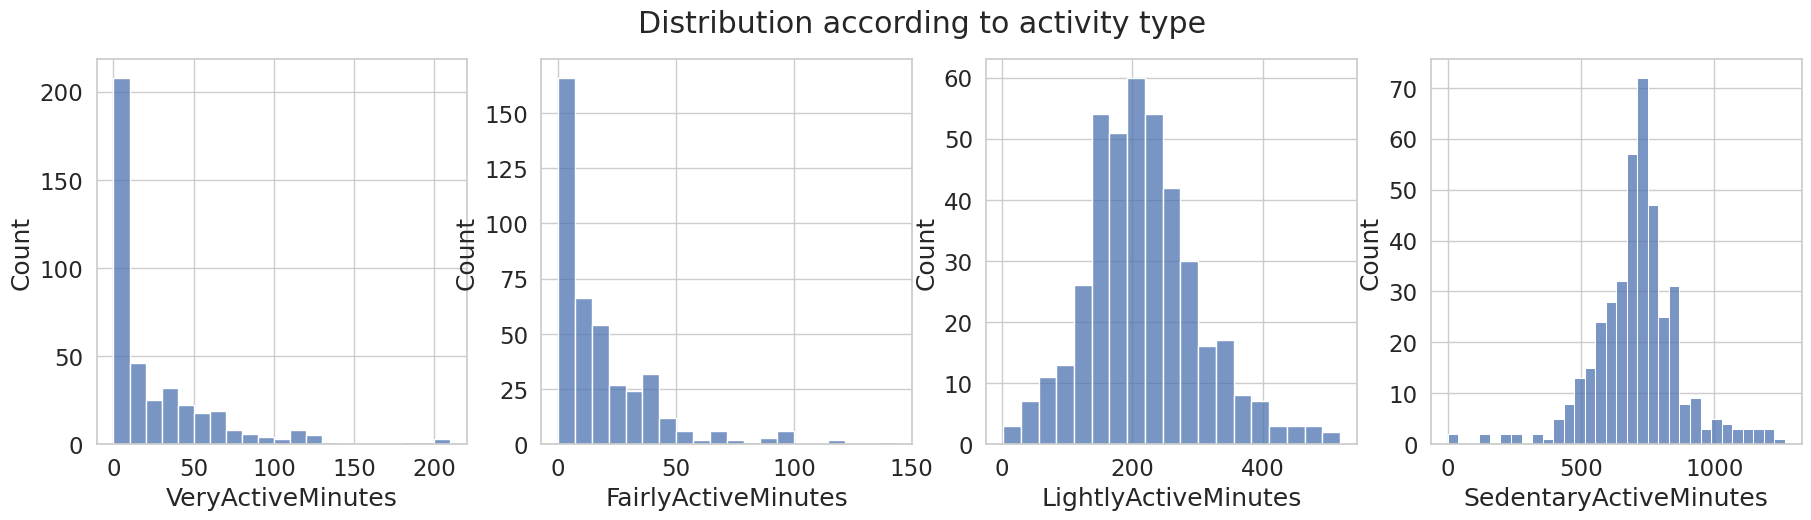

In [6]:
fig, axes = plt.subplots(1, 4, figsize=(22, 5))
fig.suptitle('Distribution according to activity type')

sns.histplot(data = df, x = 'VeryActiveMinutes', ax = axes[0]);

sns.histplot(data = df, x = 'FairlyActiveMinutes', ax = axes[1]);

sns.histplot(data = df, x = 'LightlyActiveMinutes', ax = axes[2]);

sns.histplot(data = df, x = 'SedentaryActiveMinutes', ax = axes[3]);


plt.show()

It's easy to notice that many subjects spent **very little** time as being either **Very** or **Fairly Active**.

On the other hand, the distributions of `LightlyActiveMinutes` and `SedentartActiveMinutes` are quite **symmetrical**, very much like normal distributions.

### 3.2. Sum of daily active minutes <a class="anchor" id="section_3_2"></a>

&#x1F4DD; **Task:**
- Calculate the sum of daily active minutes for each day. We define `SumActiveMinutes` as the summation of the following columns: `VeryActiveMinutes`, `FairlyActiveMinutes`, `LightlyActiveMinutes`.

In [9]:
# result column
#df['SumActiveMinutes'] = np.nan

# YOUR CODE HERE
df['SumActiveMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes']

# unit test
assert df['SumActiveMinutes'].isnull().any() == False, \
    "column SumActiveMinutes should not be empty or contain any nan values"

In [ ]:
### HIDDEN TESTS

### 3.3. Individual activity <a class="anchor" id="section_3_3"></a>

Let's analyze the extent to which each subject participated actively in reporting their daily activities and sleep statistics. 

&#x1F4DD; **Task:**

- Generate a [**pivot table**](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html) to show the individual **SumActiveMinutes** with **Id** as index and **Date** as column.
- &#128161; A pivot table is a simple way to summarize one or more numeric variables based on some discrete variables. An example is shown below (image taken from https://pandas.pydata.org/docs/user_guide/reshaping.html).

![pivot](reshaping_pivot.png)


In [15]:
# init variable
pivot = None

# YOUR CODE HERE
pivot = df.pivot_table(index='Id', columns='Date', values='SumActiveMinutes') #, aggfunc='first')

# unit test
assert isinstance(pivot, pd.DataFrame), "variable pivot should be a pd.DataFrame"
assert pivot.iloc[0,0] == 366.0

In [16]:
pivot

Date,2016-04-12,2016-04-13,2016-04-14,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,...,2016-05-03,2016-05-04,2016-05-05,2016-05-06,2016-05-07,2016-05-08,2016-05-09,2016-05-10,2016-05-11,2016-05-12
Id,,,,,,,,,,,,,,,,,,,,,
1503960366,366.0,257.0,NaN,272.0,267.0,222.0,NaN,345.0,245.0,238.0,...,328.0,NaN,319.0,319.0,258.0,255.0,263.0,291.0,310.0,NaN
1644430081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,295.0,NaN,NaN,NaN,NaN
1844505072,NaN,NaN,NaN,176.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927972279,55.0,32.0,NaN,51.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2026352035,192.0,238.0,197.0,188.0,150.0,60.0,NaN,141.0,327.0,153.0,...,NaN,345.0,475.0,383.0,229.0,258.0,401.0,17.0,330.0,343.0
2320127002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2347167796,NaN,246.0,255.0,309.0,NaN,257.0,233.0,389.0,NaN,257.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3977333714,194.0,230.0,242.0,240.0,267.0,274.0,313.0,307.0,264.0,242.0,...,346.0,252.0,280.0,252.0,294.0,296.0,NaN,312.0,NaN,NaN
4020332650,350.0,NaN,NaN,NaN,141.0,NaN,NaN,NaN,NaN,NaN,...,174.0,405.0,276.0,177.0,NaN,263.0,NaN,206.0,NaN,NaN


In [ ]:
### HIDDEN TESTS


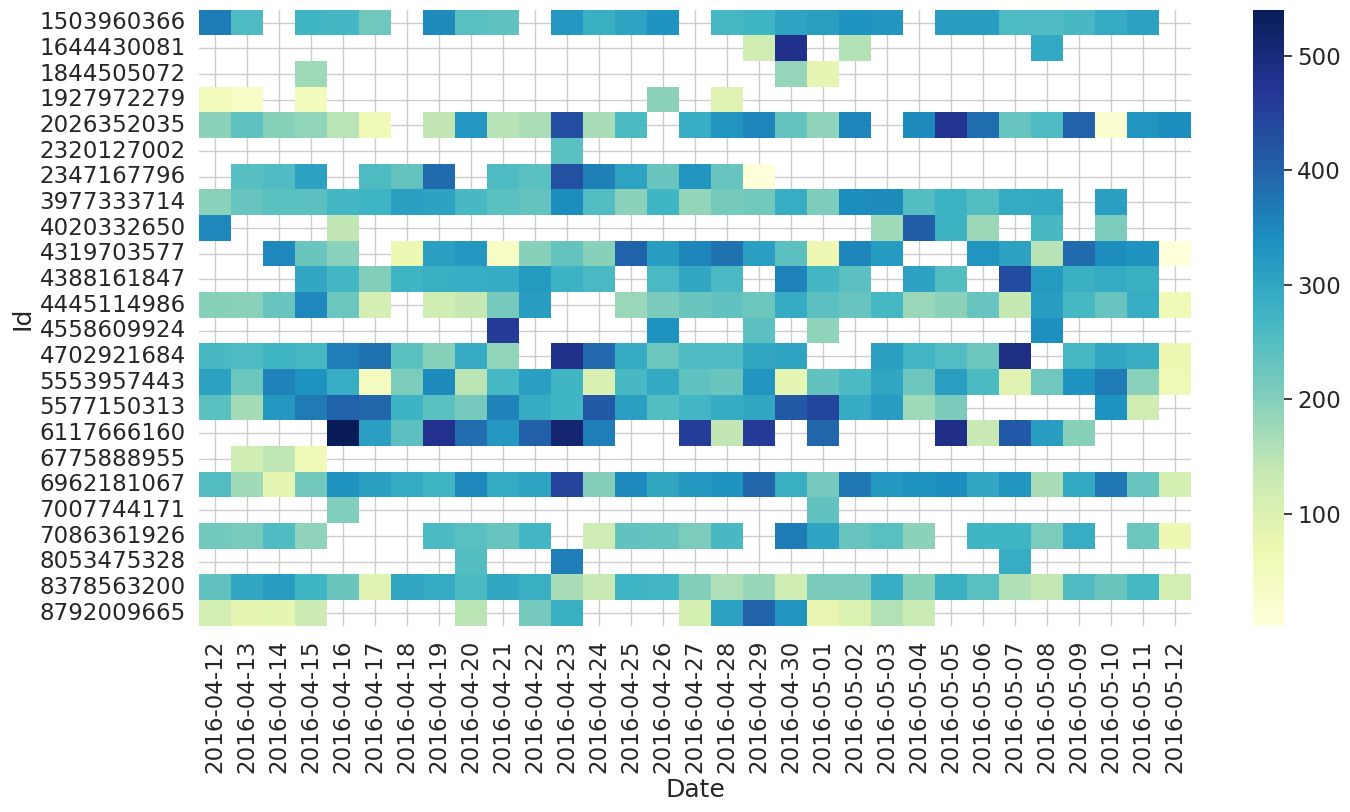

In [17]:
# run the cell to plot the heatmap
plt.figure(figsize=(16,8))
sns.heatmap(data=pivot, cmap="YlGnBu")
plt.show()

We observed that only a few subjects maintained a good routine of daily activities, while more than half of subjects showed relatively low activity level, or did not report their data.

---

## 4. Categorizing subjects <a class="anchor" id="section_4"></a>

We can now categorize the records (rows) into two groups. 

&#x1F4DD; **Task:**

- Categorize the records: those with an `effective active minutes` equal to or more than 60 minutes per day will be labeled as **Active**, while those less than 60 minutes are considered as **Inactive**. 

- Store the label in `Type` column.

- &#128161; `effective active minutes` is calculated as the sum of `FairlyActiveMinutes` and `VeryActiveMinutes`

In [18]:
# init column
#df['Type'] = np.nan

# YOUR CODE HERE
# Calculate effective active minutes (Sum of FairlyActiveMinutes and VeryActiveMinutes)
df['EffectiveActiveMinutes'] = df['FairlyActiveMinutes'] + df['VeryActiveMinutes']

# Categorize records based on effective active minutes
df['Type'] = df['EffectiveActiveMinutes'].apply(lambda x: 'Active' if x >= 60 else 'Inactive')

# unit test
assert df['Type'].isnull().any() == False
assert df['Type'].value_counts().loc["Active"] == 123

In [19]:
df.head()

,Id,Date,TotalMinutesAsleep,TotalTimeInBed,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryActiveMinutes,Calories,SumActiveMinutes,EffectiveActiveMinutes,Type
0,1503960366,2016-04-12,327,346,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,366,38,Inactive
1,1503960366,2016-04-13,384,407,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,257,40,Inactive
2,1503960366,2016-04-15,412,442,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,272,63,Active
3,1503960366,2016-04-16,340,367,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,267,46,Inactive
4,1503960366,2016-04-17,700,712,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,222,58,Inactive


In [ ]:
### HIDDEN TESTS


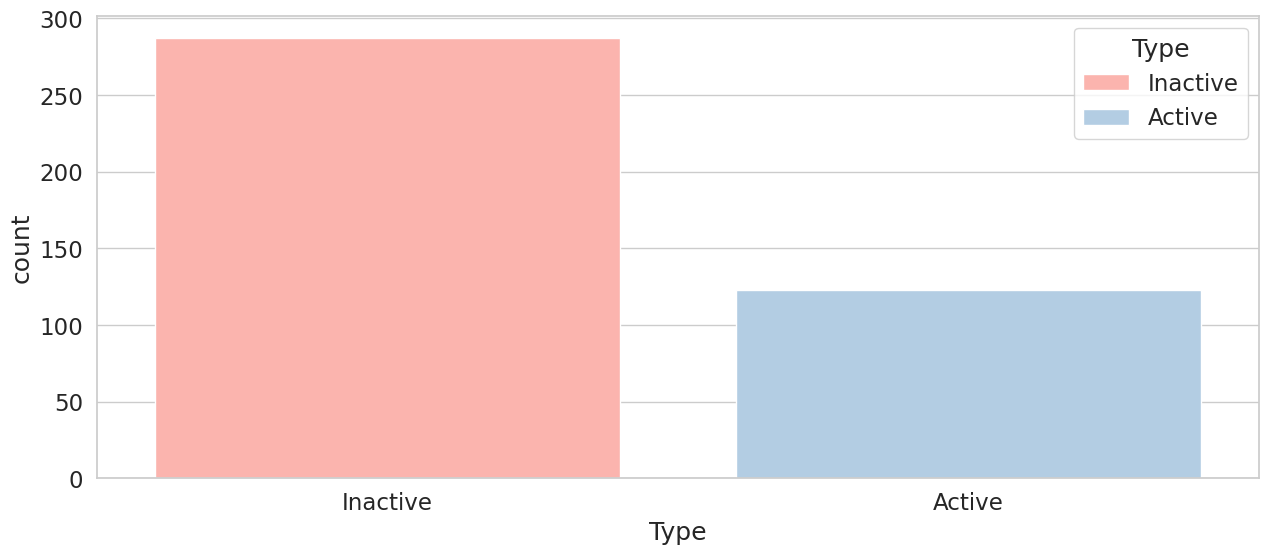

In [37]:
# run the cell
fig, ax = plt.subplots(figsize=(15,6))

sns.countplot(ax=ax, data=df, x="Type", saturation=1, palette="Pastel1", hue="Type",dodge=False)

plt.show()

&#x1F4DD; **Task:**
- Run the following code cell 
- What relationship between Calories consumption and `Type` can you make by looking at the produced plot? Write the answer in the cell below the plot.

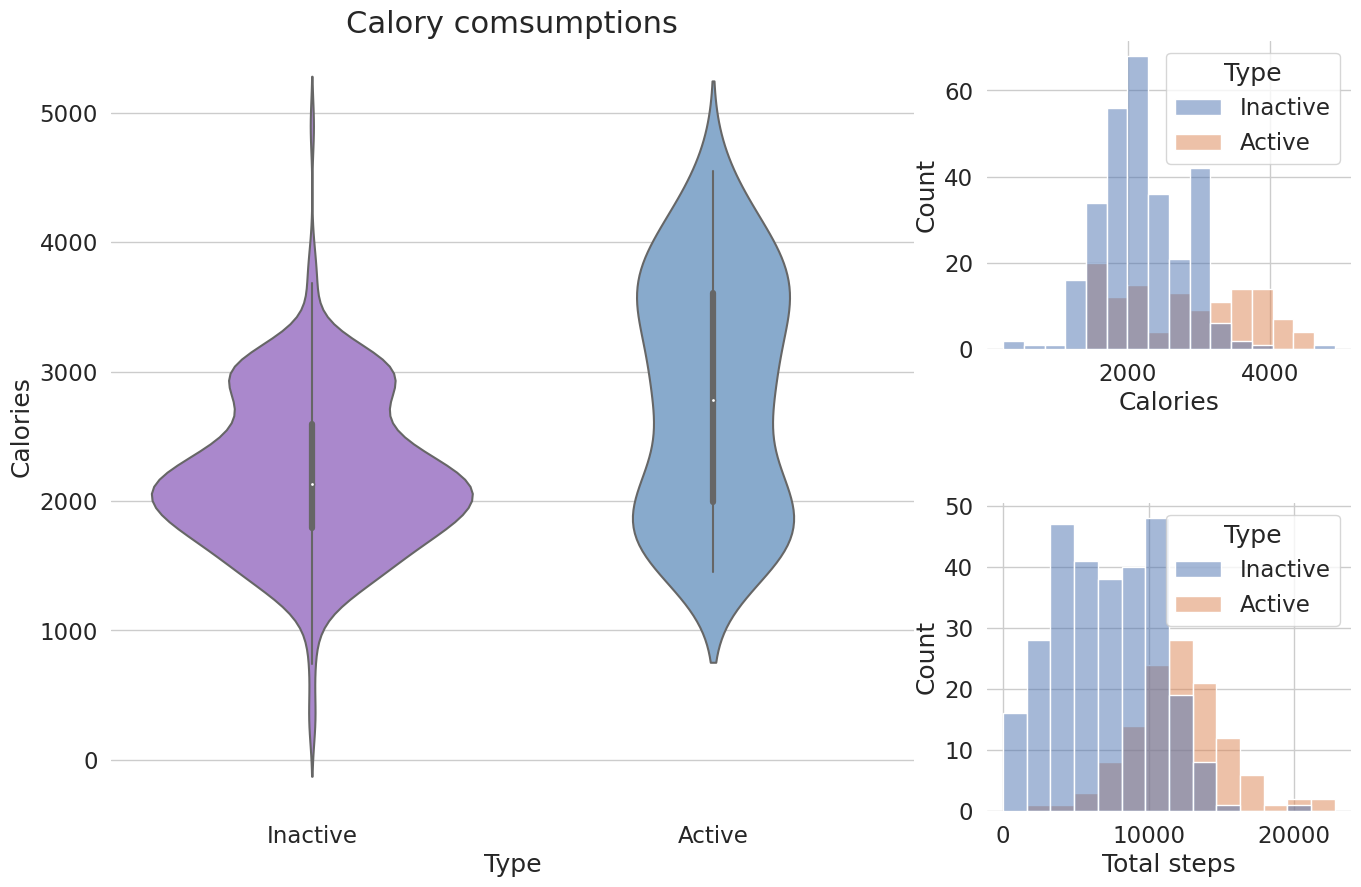

In [38]:
# run the cell
plt.figure(figsize=(16,10))

grid = plt.GridSpec(2, 3, wspace=0.2, hspace=0.5)

ax = plt.subplot(grid[0:2,0:2])
sns.violinplot(data=df, x="Type", y="Calories", saturation=.4, palette="cool_r", ax=ax)
ax.set_title("Calory comsumptions", fontsize=22)

ax = plt.subplot(grid[0,2])
sns.histplot(data=df, x="Calories", hue="Type", multiple="layer", ax=ax)

ax = plt.subplot(grid[1,2])
sns.histplot(data=df, x="TotalSteps", hue="Type", ax=ax) # add a space to x-axis label
ax.set_xlabel("Total steps")

sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

From the cell plot, it is possible to observe that "active" individuals on average burn more calories than "inactive" individuals. It is interesting to note that both distributions are quite spread out, without a single well-defined peak (especially for the calories burned by "active" individuals). From the histograms, we can first note that the number of inactive people is greater than the number of "active" individuals (this can be seen from the difference in counts). In particular, the separation between the number of steps taken by active and inactive individuals is not very clear, although some high values for the TotalSteps are only reached by active individuals.

---

## 5. Sleep Analysis <a class="anchor" id="section_5"></a>
Now, let's examine the relationships between `TotalTimeInBed` and `TotalMinutesAsleep`.

First, we draw a `jointplot` to visualize the data's distribution.

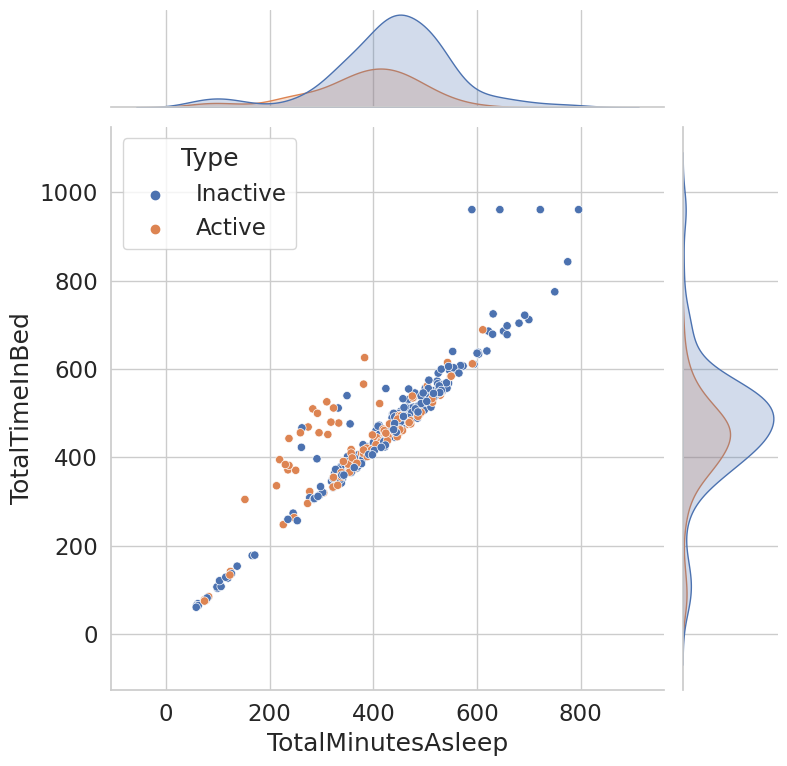

In [39]:
# run the cell
ax = sns.jointplot(data=df,
              x="TotalMinutesAsleep",
              y="TotalTimeInBed",
              kind="scatter",
              height=8,
              hue="Type")

plt.show()

At first glance, we find a strong linear relationship between these two features. However, the distinction between the two types is not so obvious, and we may need to use a different categorization to segment the data.

### 5.1. Splitting records according to sleep conditions <a class="anchor" id="section_5_1"></a>

According to the [CDC](https://www.cdc.gov/sleep/about_sleep/how_much_sleep.html), an adult should get seven or more hours of sleep daily. Here we can define three sleep conditions: **Oversleep**, **Adequate**, and **Inadequate**.

The criteria for each condition are:
- **Oversleep** if the sleep duration is $ \gt $ 8 hours.
- **Adequate** if the sleep duration lies **between 6 hours (excluded) and 8 hours (included)**.
- **Inadequate** if the sleep duration is $ \le $ 6 hours.

&#x1F4DD; **Task:**
- implement a `sleep condition mapping`, which maps the **numerical sleeping minutes** into **three categorical conditions above**.
- &#128161; you can use the [pd.cut()](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) function, which converts numeric values into categorical bins.

In [43]:
df.head()

,Id,Date,TotalMinutesAsleep,TotalTimeInBed,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryActiveMinutes,Calories,SumActiveMinutes,EffectiveActiveMinutes,Type
0,1503960366,2016-04-12,327,346,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,366,38,Inactive
1,1503960366,2016-04-13,384,407,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,257,40,Inactive
2,1503960366,2016-04-15,412,442,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,272,63,Active
3,1503960366,2016-04-16,340,367,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,267,46,Inactive
4,1503960366,2016-04-17,700,712,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,222,58,Inactive


In [46]:
def sleep_condition_mapping(x) -> pd.Series:
    """
    Params:
        a numpy array or a pd.Series
    
    Returns:
        a numpy array or a pandas categorical array
    """
    
    # Define the bins and labels for sleep conditions
    bins = [-np.inf, 360, 480, np.inf]  # In minutes: Inadequate, Adequate, Oversleep
    labels = ["Inadequate", "Adequate", "Oversleep"]

    # Use pd.cut to map the numerical sleeping minutes into categorical conditions
    result = pd.cut(x, bins=bins, labels=labels, right=True)
    
    return result


# unit test
test_data = np.array([200,300,360,400,480,500,600]) # generate test data
test_res = sleep_condition_mapping(test_data)

assert isinstance(test_res, pd.core.arrays.categorical.Categorical) or \
isinstance(test_res, np.ndarray), \
"return value should be a numpy array or pandas array"

assert np.array_equal(
    test_res,
    np.array(['Inadequate', 'Inadequate',
              'Inadequate', 'Adequate',
              'Adequate', 'Oversleep', 'Oversleep'])
), "invalid solution"

In [ ]:
### HIDDEN TESTS

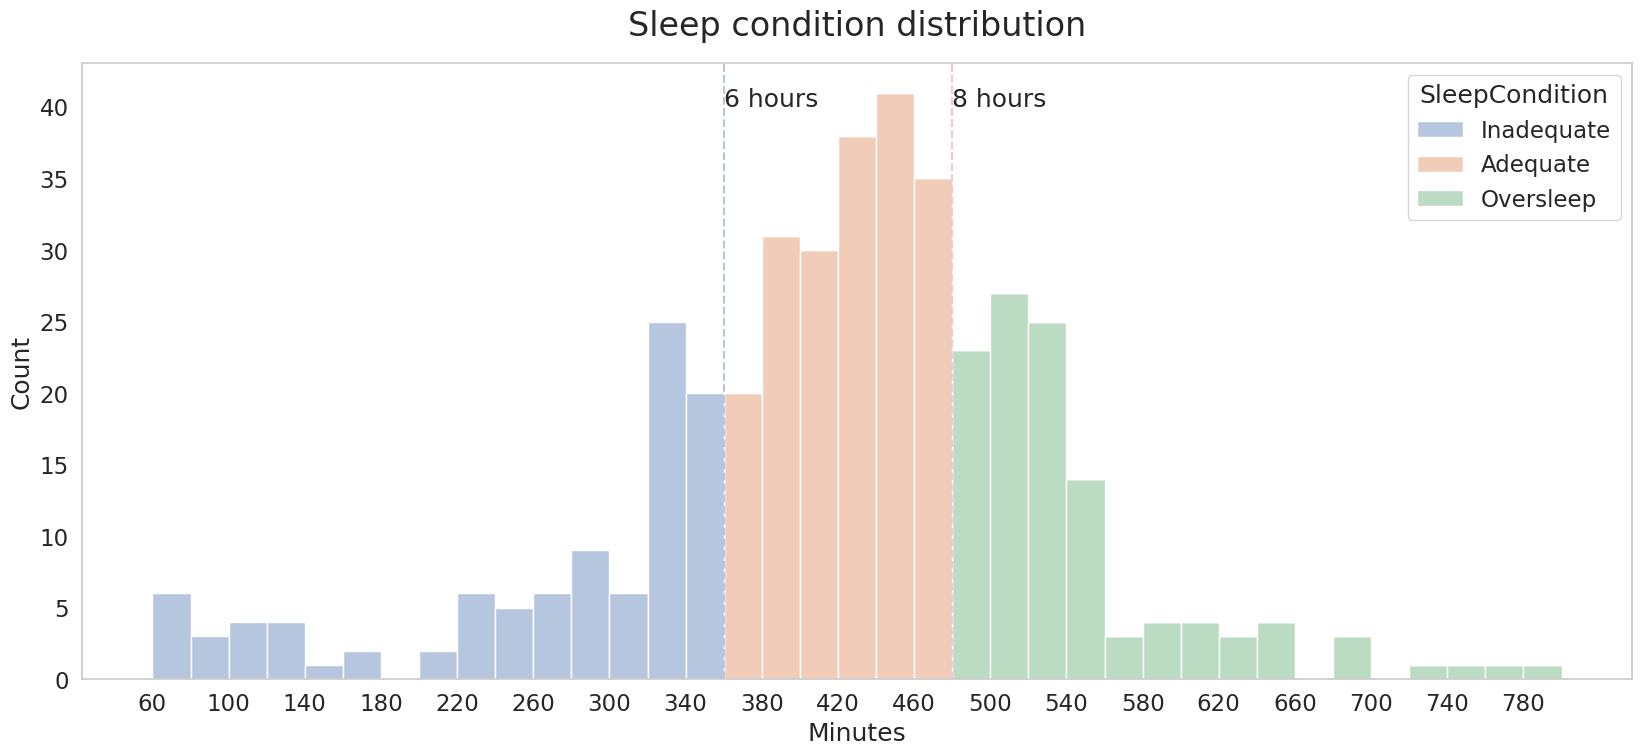

In [48]:
# run the cell

# apply threshold mapping
df['SleepCondition'] = sleep_condition_mapping(df['TotalMinutesAsleep'])

# plot sleep condition distribution
fig, ax = plt.subplots(figsize=(20,8))

sns.histplot(ax=ax, data=df, x="TotalMinutesAsleep", hue="SleepCondition", multiple="stack", alpha=0.4, bins=40, binwidth=20, binrange=(60.00001,800))
ax.axvline(x=360, color='#b7c6df', linestyle='--')
ax.axvline(x=480, color='#f1c6d9', linestyle='--')
ax.text(360,40, "6 hours")
ax.text(480,40, "8 hours")
ax.set_title("Sleep condition distribution", fontsize=24, pad=20)
ax.set_xlabel("Minutes")

ax.set_xticks(range(60,800, 40))
ax.grid(False)
plt.show()

### 5.2. Weekly sleep statistics <a class="anchor" id="section_5_2"></a>

Now, we plot the weekly sleep statistics with sleep condition labels.

<Figure size 1600x800 with 0 Axes>

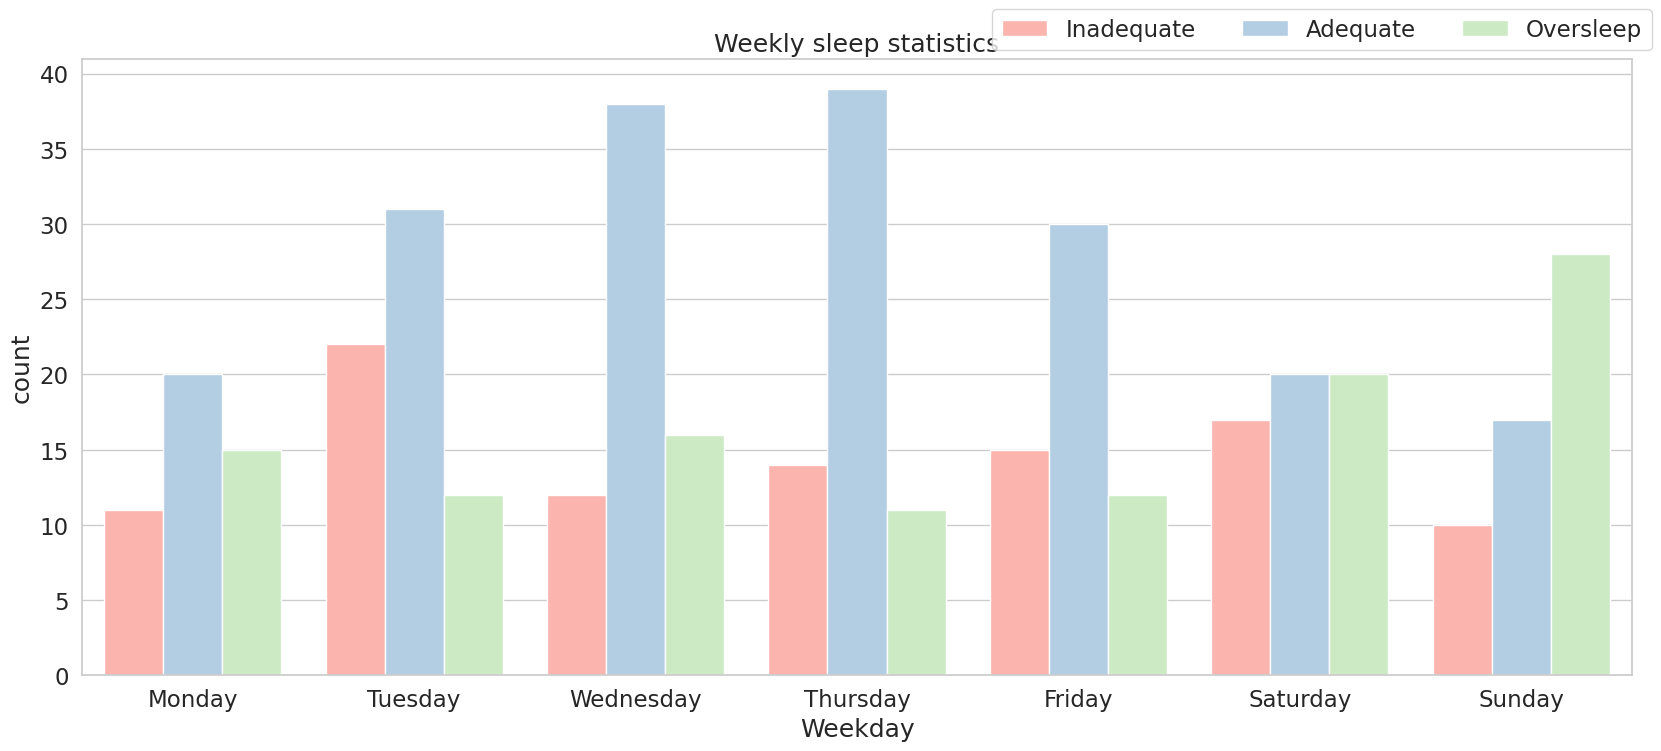

In [49]:
# run the cell

df['Weekday'] = pd.to_datetime(df['Date']).dt.day_name() # get weekdays
df["Weekday"] = pd.Categorical(df["Weekday"], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.figure(figsize=(16,8))

# boxplot to inspect distributions
fig, ax = plt.subplots(figsize=(20,8))
sns.countplot(ax=ax, data=df, x="Weekday", saturation=1, palette="Pastel1", hue="SleepCondition")
plt.legend(loc='upper right')
           
ax.set_ylabel('count')
ax.set_title("Weekly sleep statistics")
plt.legend(ncol=3,loc='upper left', bbox_to_anchor=(0.58, 1.1))
plt.show()

&#x1F4DD; **Task:**

- What observations can you draw from the figure?
- Try to present your findings from multiple perspectives, such as the general trend of sleep condition from Monday to Sunday, where the peak of each condition occurs, and so on. 
- Bonus point if you can come up with some theories to explain your observation.



It is possible to note that adequate sleep quality is higher during the middle of the week, when people typically have established a regularity in their sleep cycle. As a result, both inadequate sleep cycles and oversleep cycles are reduced. During the weekend, however, starting from Friday and ending on Sunday, cases of adequate sleep begin to decrease, in favor of inadequate sleep (especially on Saturday, when people go to bed later because they go out to party) and of adequate sleep (especially on Sunday, when most people, not having to work, sleep longer)

# References

[1]Aledavood, T., Lehmann, S., & Saramäki, J. (2018). Social network differences of chronotypes identified from mobile phone data. EPJ Data Science, 7(1), 46. https://doi.org/10.1140/epjds/s13688-018-0174-4

[2] https://towardsdatascience.com/missing-value-handling-missing-data-types-a89c0d81a5bb